#**EDA: Fatal Police Shootings in the US**

In recent years, particularly since the case of [**George Floyd**](https://www.nytimes.com/2020/05/31/us/george-floyd-investigation.html) in Minneapolis, **25 May 2020**, **Police Brutality** has become a hot button issue in the United States. The number of homicides committed by police in the United States is often compared to those in countries such as England, where the number is significantly lower

You as a Data Scientist is required to analyze the dataset of **Fatal Police Shootings** maintained by [**The Washington Post**](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/) to analyze how biased the shootings are by race or state 



<img src="https://drive.google.com/uc?export=view&id=1VBgOxQ6y6yauF8sVs3XwPmQkHrui8MVK" align="right">



###**Dataset Description:**

**The Washington Post** is compiling a [database](https://github.com/washingtonpost/data-police-shootings) of every fatal shooting in the United States by a police officer in the line of duty since Jan. 1, 2015.

In 2015, The Post began tracking more than a dozen details about each killing — including the race of the deceased, the circumstances of the shooting, whether the person was armed and whether the victim was experiencing a mental-health crisis — by culling local news reports, law enforcement websites and social media and by monitoring independent databases such as Killed by Police and Fatal Encounters. The Post conducted additional reporting in many cases.


The dataset contains the following attributes:

- **id** - Unique ID 
- **name** - Name of the Victim
- **date** - Date of the Shootout
- **manner of death** - Manner of Death i.e., Shot or Shot & Tasered
- **armed** - Arm
- **age** - Age of the Victim
- **gender** - Gender
- **race** - Race of the Victim
       W: White, non-Hispanic 
       B: Black, non-Hispanic 
       A: Asian 
       N: Native American 
       H: Hispanic 
       O: Other 
       
- **city** - City in which the Shootout happened
- **state** - State in which the Shootout happened
- **signs of mental illness** - Boolean Value. Whether the victim had any signs of mental illness during the shootout
- **threat_level** - Threat Level posed by the victim
- **flee** - Whether the victim tried to flee during the shootout
- **body_camera** - Boolean Value. Whether the Police Officer's were wearing body_camera during the shootout

In [ ]:
# Importing the Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Loading the Dataset from the Dropbox

!wget https://www.dropbox.com/s/k0wf1avmyq4cars/fatal-police-shootings-data.csv

--2020-07-27 11:31:08--  https://www.dropbox.com/s/k0wf1avmyq4cars/fatal-police-shootings-data.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/k0wf1avmyq4cars/fatal-police-shootings-data.csv [following]
--2020-07-27 11:31:08--  https://www.dropbox.com/s/raw/k0wf1avmyq4cars/fatal-police-shootings-data.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbce5fec4f0d1dea39156737fb6.dl.dropboxusercontent.com/cd/0/inline/A8VsutviIcfWeCAsG5HY51m7KsjeTaN8-h-g0vQweemzndrrUdFFL9FeX49plR8V2BzqHzyPEV1PSxpl1_CDUakx4NyMDGzvbJqrw82y4UnzqNMzcwkZhosWzrOAyZwMjqk/file# [following]
--2020-07-27 11:31:08--  https://ucbce5fec4f0d1dea39156737fb6.dl.dropboxusercontent.com/cd/0/inline/A8VsutviIcfWeCAsG5HY51m7KsjeTaN8-h-g0vQweemzndrrUdFFL9

In [ ]:
df = pd.read_csv('fatal-police-shootings-data.csv', encoding='latin1')
df.head(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
df.shape

(5416, 14)

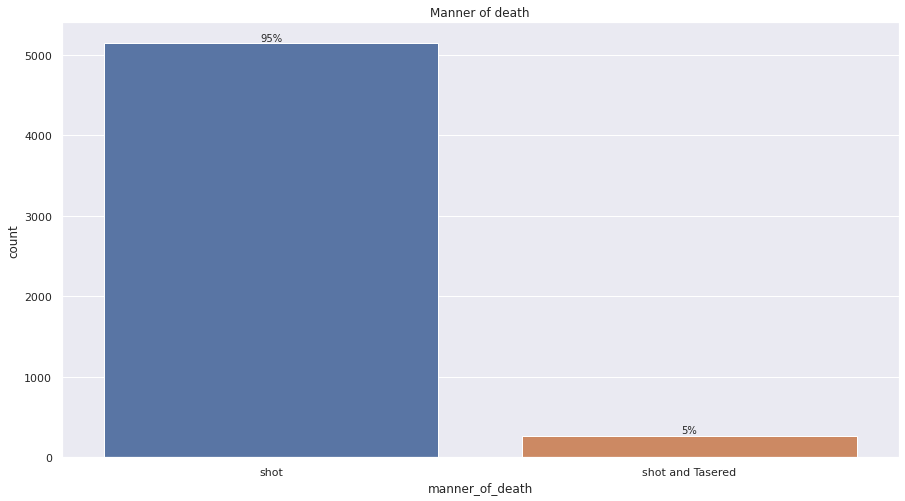

In [ ]:
# Plot the manner of death

plt.figure(figsize=(15,8))
ax = sns.countplot(x='manner_of_death', data=df)
plt.title('Manner of death')
for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    
    y = p.get_bbox().get_points()[1,1]
    
    ax.annotate('{:.2g}%'.format(100.*y/len(df)), (x.mean(), y), ha='center', va='bottom')
plt.show()

___
**Observation:**
- In **95%** of the cases, the individual was shot and killed and in **5%** of the total cases he/she was tasered and shot dead
___

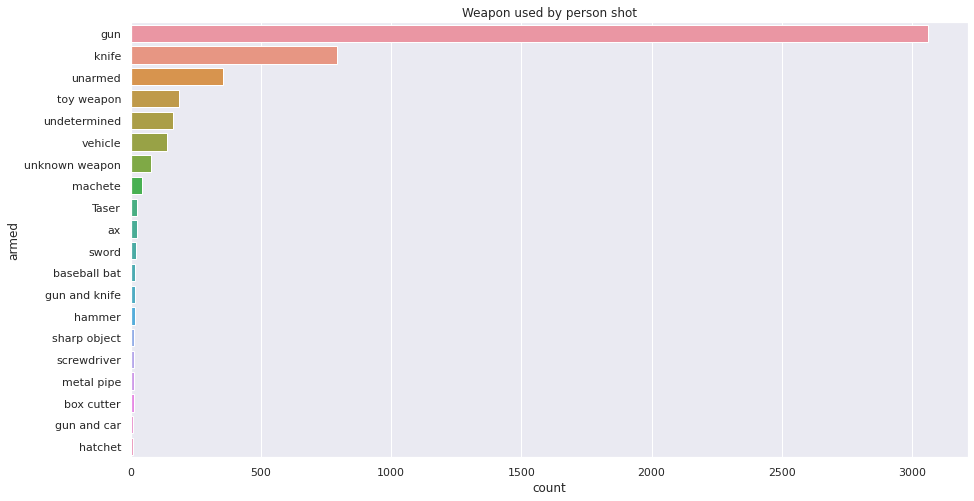

In [ ]:
# Plot the 20 most common weapons used by individuals shot
plt.figure(figsize=(15, 8))
ax = sns.countplot(y='armed', data=df,
                   order = df.armed.value_counts().iloc[:20].index)
plt.title('Weapon used by person shot')
plt.show()

___
**Observations:**

- Most of victims had a **Gun** or a **Knife** at time of incident
- An alarmingly high proportion of individuals shot by police were either **Unarmed** or **Armed** with a **Toy Weapon**
___

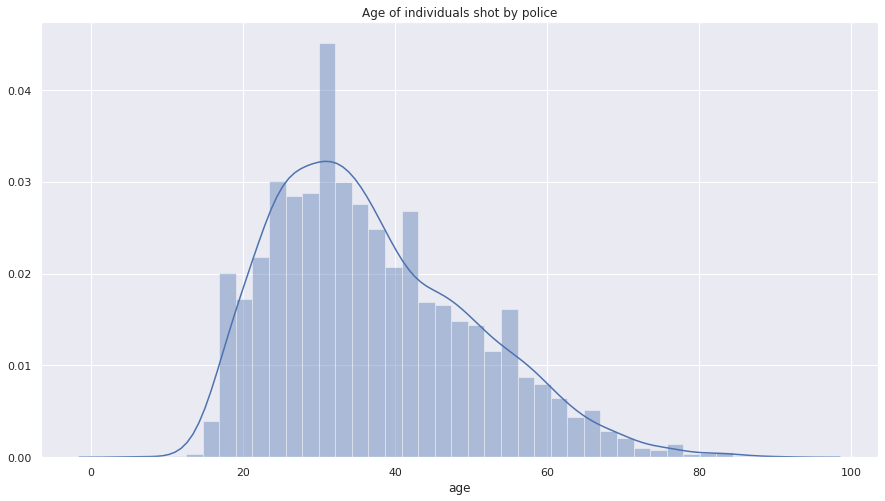

In [ ]:
plt.figure(figsize=(15, 8))

sns.distplot(df.age[~np.isnan(df.age)])
plt.title('Age of individuals shot by police')
plt.show()

In [ ]:
len(df[df.age<16])

20

___
**Observations:**
- Most of the individuals shot and killed by police were between the ages of 20 and 40, with very few older than 80 or younger than 16.  Though there are 20 children under the age of 16 that were killed by police.
___

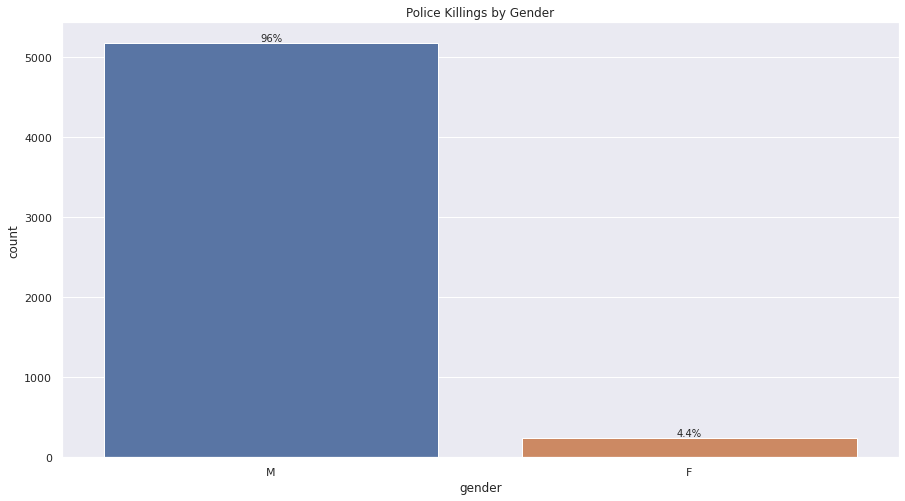

In [ ]:
# Plot police killings by gender
plt.figure(figsize=(15, 8))

ax = sns.countplot(x = "gender", data = df,
                   order = df.gender.value_counts().index)
for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate('{:.2g}%'.format(100.*y/len(df)), (x.mean(), y), ha='center', va='bottom')
plt.title('Police Killings by Gender')
plt.show()

___
**Observations:**
- Most of the individuals shot by police were male
- This is expected because females commit less crimes comparative to males
___


According to the [**US Census**](https://www.census.gov), the population of the United States is **50.8% female** and **49.2% male**.  How does this distribution match up to the distribution of police killings?



![](https://drive.google.com/uc?export=view&id=1UfL1I_ETY7iqZ-4PIw3UFz0NRzuIpTKl)


Let Us define a function which will return a dataframe with the actual percentages and also the population percentages for any per-group count.

In [ ]:
def ActualVsPopulation(df, pop, group):
    """Get dataframe with actual per-group percentage vs population group percentage"""
    d = {group: [], 'type': [], 'percent': []}
    tot_pop = float(sum(pop.values()))
    for g in df[group].dropna().unique(): #for each group

        # Actual percentages
        d[group].append(g)
        d['type'].append('Killings')
        d['percent'].append(100*df[df[group]==g].id.count()/df.id.count())

        # Percentages if statistic followed population distribution
        d[group].append(g)
        d['type'].append('Population') #based on population percentage
        d['percent'].append(100*pop[g]/tot_pop)
        
    return pd.DataFrame(data=d)

Now we can see the actual killings distribution versus the population distribution:

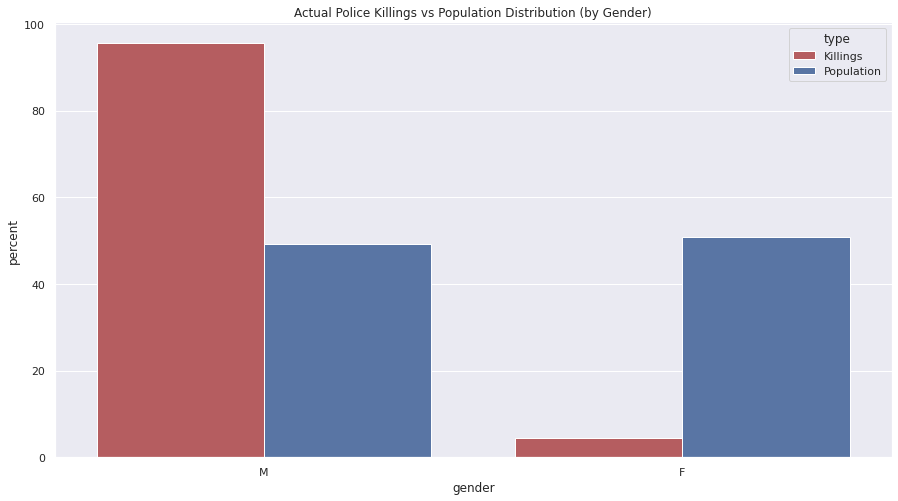

In [ ]:
# Plot percent police killings by gender vs population percentages
pop_g = {'M': 49.2, 'F': 50.8} #percent population by gender https://www.census.gov/quickfacts/fact/table/US
df = ActualVsPopulation(df, pop_g, 'gender')

plt.figure(figsize=(15, 8))
sns.barplot(x="gender", y="percent", hue="type", data=df, palette=["r", "C0"])
plt.title('Actual Police Killings vs Population Distribution (by Gender)')
plt.show()

Next we'll plot the number of police killings by race.

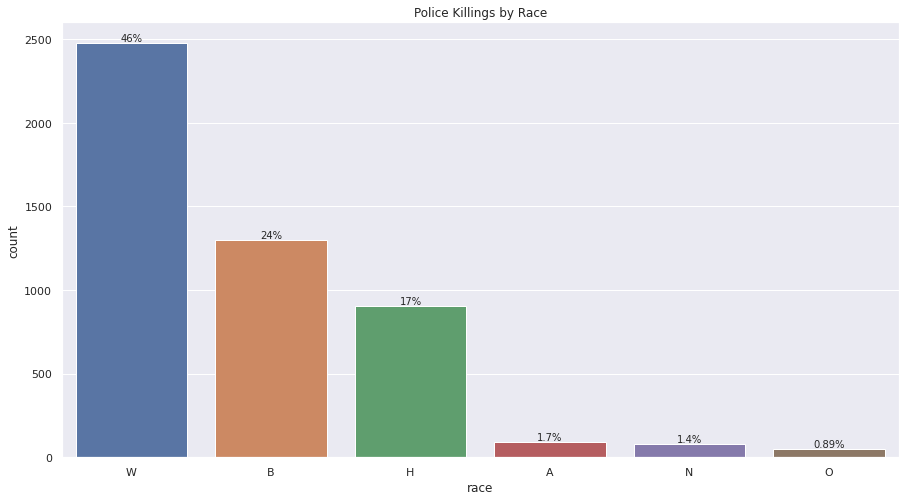

In [ ]:
# Plot police killings by race

df1 = pd.read_csv('fatal-police-shootings-data.csv', encoding='latin1')

plt.figure(figsize=(15,8))
ax = sns.countplot(x="race", data=df1,
                   order = df1.race.value_counts().index)
for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate('{:.2g}%'.format(100.*y/len(df1)), (x.mean(), y), ha='center', va='bottom')

plt.title('Police Killings by Race')
plt.show()

___
**Observation:**.
- White people are the most suffered

- Hispanic are the next to black and white people
___

How does this match up to the population distribution?


![Picture](https://drive.google.com/uc?export=view&id=148OBEmiOiJJStx8AywFbzcQDfzF6Xc7F)


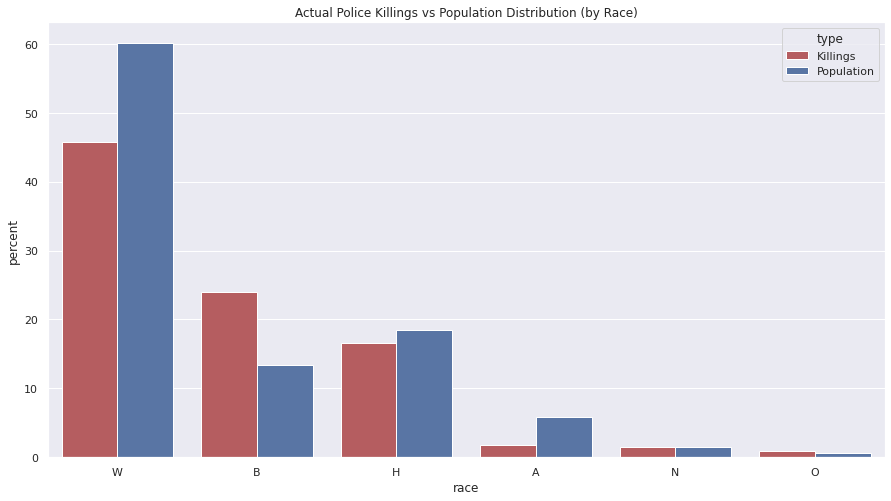

In [ ]:
# Plot percent police killings by race vs population percentages

#Population (%) by race gathered from https://www.census.gov/quickfacts/fact/table/US

pop_r = {'W': 60.1, # White  
         'B': 13.4, # Black or African american
         'H': 18.5, # Hispanic or Latino
         'A': 5.9,  # Asian
         'N': 1.5,  # American indian, Alaska Native, Native Hawaian, and Other Pacific Islander
         'O': 0.6}  # other



df = ActualVsPopulation(df1, pop_r, 'race')

plt.figure(figsize=(15,8))
sns.barplot(x="race", y="percent", hue="type", data=df,
            order = df1.race.value_counts().index, palette=["r", "C0"])
plt.title('Actual Police Killings vs Population Distribution (by Race)')
plt.show()

___
**Observation:**
- Although half of the people shot and killed by police are **White**, **Black Americans** are shot at a disproportionate rate. They account for less than **14** percent of the U.S. population, but are killed by police at more than twice the rate of white Americans
- **Hispanic Americans** are also killed by police at a disproportionate rate
___

Let's plot the number of police killings by state:

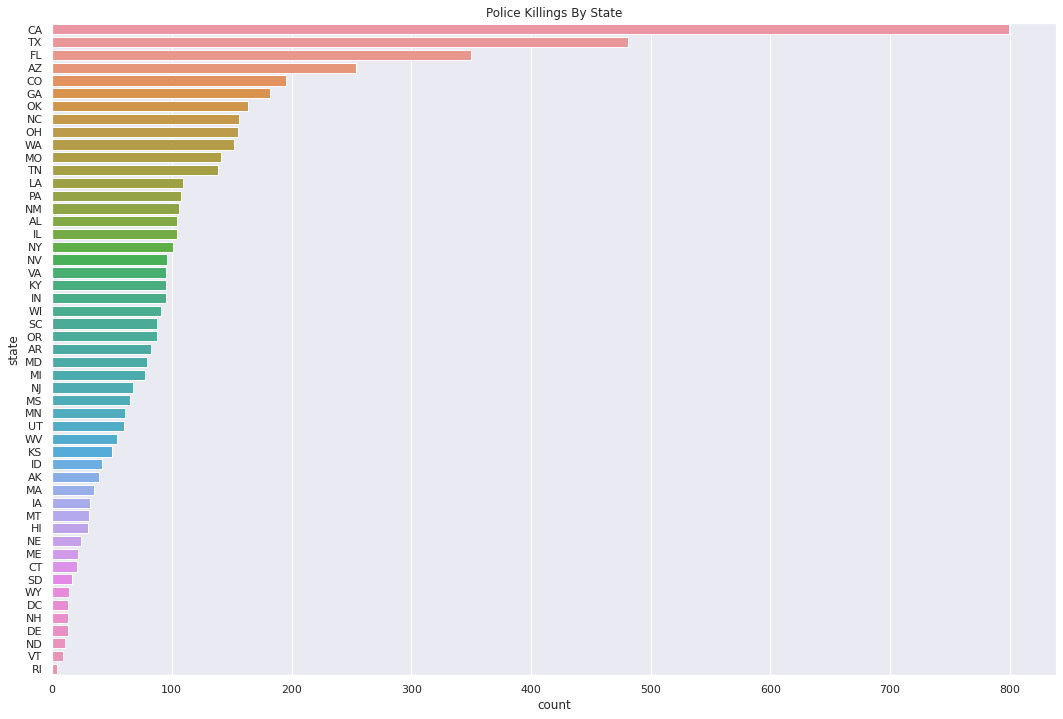

In [ ]:
plt.figure(figsize=(18, 12))

sns.countplot(y="state", 
              data=df1,
              order=df1.state.value_counts().index)
plt.title('Police Killings By State')
plt.show()

___
**Observation:**
- **California** is the state with the Highest Number of Killings followed by **Texas**, **Florida**, **Arizona**, and so on
___

___
**DIY**

Find the Number of Police Killings in the State of California by Race wrt to the Population Distribution by Race in it to find out if the Poilce is targetting any specific community.



![Picture](https://drive.google.com/uc?export=view&id=1DCow0KHQa50QQHfTes1VczbcIfDBKYty)

___


In [ ]:
# Convert date from object to datetime
df1.date = pd.to_datetime(df1.date)

And now we can see how the shooting frequency has changed over time:

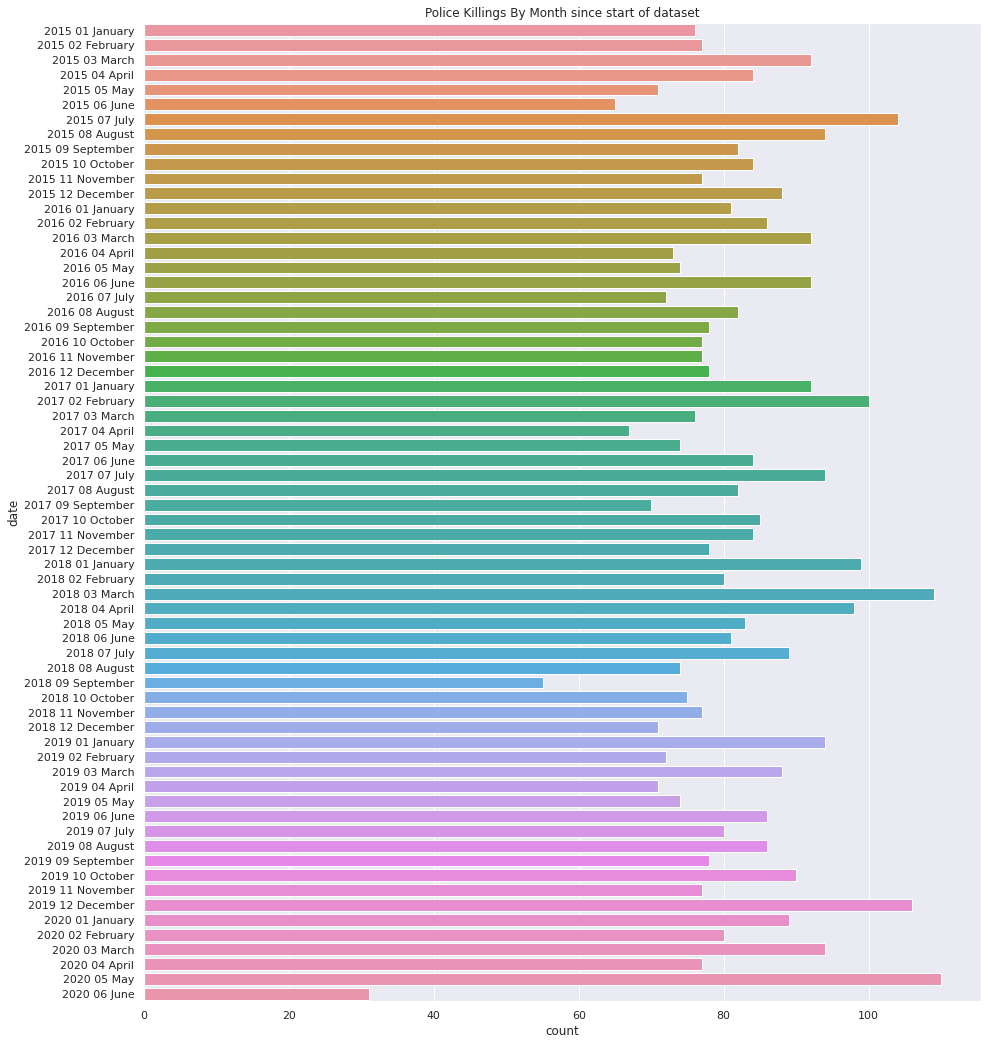

In [ ]:
# Plot shootings by month
plt.figure(figsize=(15,18))
sns.countplot(y=df1.date.dt.strftime('%Y %m %B'), 
              order=sorted(df1.date.dt.strftime('%Y %m %B').unique()))
plt.title('Police Killings By Month since start of dataset')
plt.show()

___
**Observation:**

- From above, we can infer that the rate of shootings remains steady
___


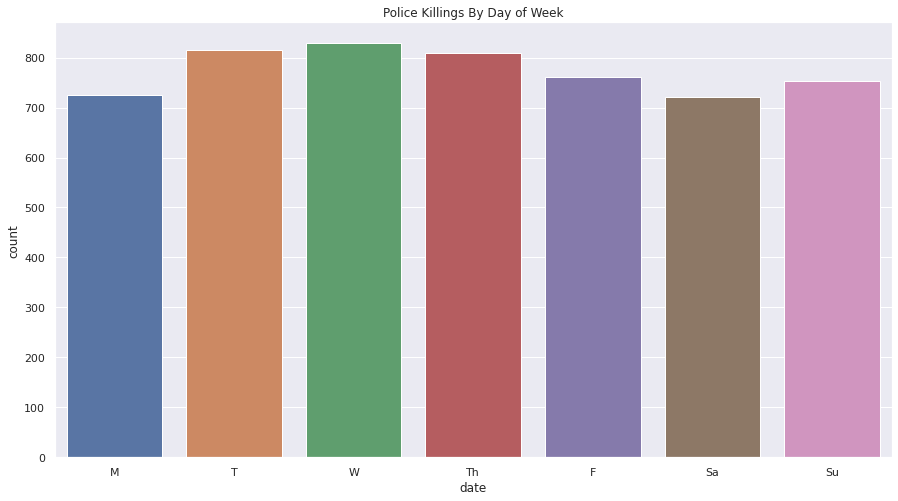

In [ ]:
# Plot shootings by day of week
dow_map={0:'M', 1:'T', 2:'W', 3:'Th', 4:'F', 5:'Sa', 6:'Su'}

plt.figure(figsize=(15,8))

sns.countplot(x=df1.date.dt.dayofweek.map(dow_map), order=dow_map.values())
plt.title('Police Killings By Day of Week')
plt.show()

___
**Observation:**

- Most people are shot around mid of weekdays
- Killings on weekends is lesser in comparison to weekdays
___

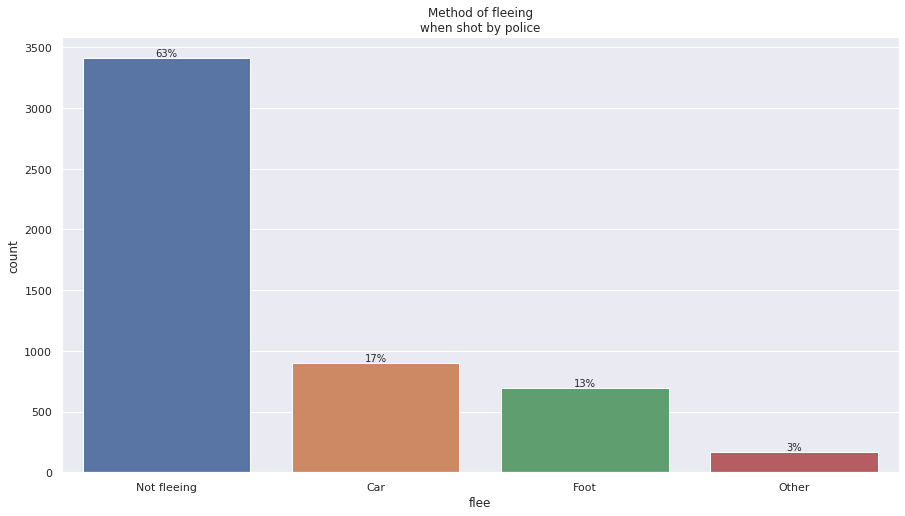

In [ ]:
# Plot how many individuals were fleeing when shot

plt.figure(figsize=(15,8))

ax = sns.countplot(x='flee', data=df1)
for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate('{:.2g}%'.format(100.*y/len(df1)), (x.mean(), y), ha='center', va='bottom')
plt.title('Method of fleeing\nwhen shot by police')
plt.show()

___
**Observation :**

- **63%** of victimes didnot try to flee yet they were killed.This is completely an unexpected scenario

- Only **17%** of people tried to flee by car and **13%** tried to flee by foot

___

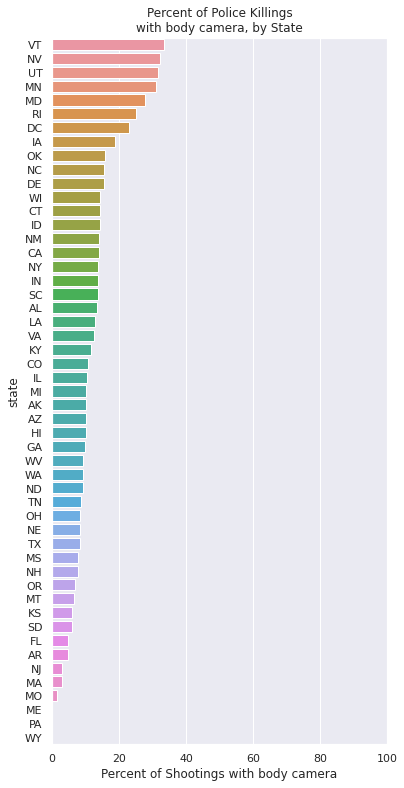

In [ ]:
# Count the proportion of shootings with body camera by state
pcPK = df1.groupby('state').agg({'body_camera': 'mean'})



# Plot percent of shootings with body camera by state

plt.figure(figsize=(6, 13))
sns.barplot(y=pcPK.index, 
            x=100.*pcPK.values.flatten(),
            order=pcPK.body_camera.sort_values(ascending=False).index)
plt.title('Percent of Police Killings\nwith body camera, by State')
plt.xlabel('Percent of Shootings with body camera')
plt.xlim([0, 100])
plt.show()

___
**Observation:**

- The percentages of police shootings where the officer was wearing a body camera in the State of **Calfornia**, **Texas**, and **Florida** is very low despite the fact that it has the highest number of police killings in all the 55 states of the USA

- The State of **Vermont** ranks at the 3rd last position in terms of Number of Police Killings. And, here it is observed that it ranks **Number 1** in terms of **body_camera** usage
___

___
##**Findings**

- **White** and **Black** race people are the most affected

- Youngsters to Adults around the age of **20-40** are the most affected

- The State of **California**, **Texas**, and **Florida** have recorded the most number of deaths

- **Black Race** people are widely killed in the US 

- **63%** of **Non-fleeing** people were killed in the shootout by the Police


- In a significant amount of cases, the victim was either **Unarmed** or had a **toy gun**
___

